# Numerical analysis - FFF homeostasis

## Lib

In [1]:
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

sys.path.append("../")
import lib.utils as utils
from lib.utils import FFF_solver

## Auxiliary functions

In [2]:
def calculate_I0(params, fiber="UNSAT"):
    if fiber=="UNSAT":
        return params[1]*((3/8)*((1-params[4])/(1+params[4])) - 0.75)
    else:
        return -params[1]*((3/8)*((1-params[4])/(1+params[4])) - 0.25)
    

## Case 1: UNSAT-FFF

In [19]:
# Params vector: [delta, gamma, alpha, beta, sigma]
# regulation: f = [0,1] = [activator, repressor]
# regulation: g = [0,1,2,3] = [all repressor for now]
# coordinate vectors: [x_1R, x_1P, x_2R, x_2P, x_3R, x_3P]

#params_1 = [3.0,0.5,3.0,1.0,0.5]
params_1 = [2.5, 1.2, 0.311, 1.0, 0.0]
initial_1 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]               

base = 3*np.sqrt(3)/8
par_div = params_1[0]*params_1[2]/(params_1[3]*params_1[1])
print(base, par_div)

c1_fff = FFF_solver(params_1)
c1_fff.set_initial(initial_1)
c1_fff.set_regulations(1,1)

0.649519052838329 0.6479166666666667


In [20]:
res = utils.run_fff_test(params_1, initial_1, (1,1), npoints_I=70)

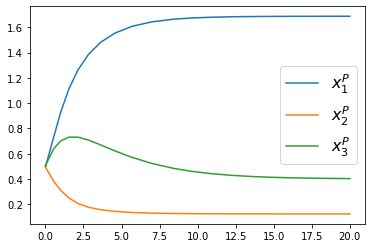

In [21]:
# Example
sol = res[0]

fig, ax = plt.subplots(1)
ax.plot(sol.t, sol.y[1], label=r"$x_1^P$")
ax.plot(sol.t, sol.y[2], label=r"$x_2^P$")
ax.plot(sol.t, sol.y[3], label=r"$x_3^P$")
ax.legend(prop={'size':16})

In [22]:
pm_delta = 2.0
npoints = 70
I0 = calculate_I0(params_1, "UNSAT")
I_min, I_max = I0 - pm_delta, I0 + 2*pm_delta
#if I_min < -params_1[1]: I_min = -params_1[1]
#input_range = np.linspace(I_min, I_max, npoints)

print(f"Expected infinitesimal homeostasis point value: {I0:0.3}")
print(f"Interval to calculate set point: [{I_min:0.3},{I_max:0.3}]")

Expected infinitesimal homeostasis point value: -0.45
Interval to calculate set point: [-2.45,3.55]


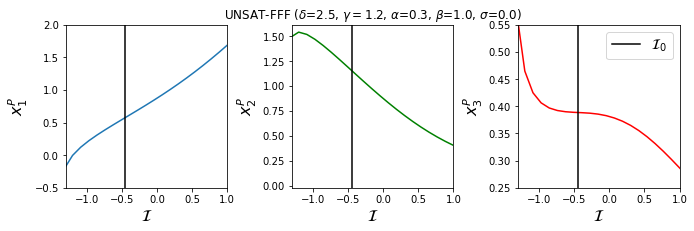

In [23]:
input_range = res[1]
x1p, x2p, x3p = res[2]

fig, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(11,3))
ax.plot(input_range, x1p)
ax1.plot(input_range, x2p, c="green")
ax2.plot(input_range, x3p, c="red")
ax.set_xlim([-1.3,1.0])
ax1.set_xlim([-1.3,1.0])
ax2.set_xlim([-1.3,1.0])
ax2.set_ylim([0.25,0.55])
ax.set_ylim([-0.5,2])
ax.axvline(I0, 0, 1, color="black")
ax1.axvline(I0, 0, 1, color="black")
ax2.axvline(I0, 0, 1, color="black", label=r"$\mathcal{I}_0$")
#ax.axhline(0.2, -2, 2, color="black", ls=":")
ax2.legend(prop={'size':14}, loc=1)

for axis in [ax,ax1,ax2]:
    axis.set_xlabel(r"$\mathcal{I}$", fontsize=16)
ax.set_ylabel(r"$x_1^P$", fontsize=16)
ax1.set_ylabel(r"$x_2^P$", fontsize=16)
ax2.set_ylabel(r"$x_3^P$", fontsize=16)
title1 = r"UNSAT-FFF ($\delta$=%0.1f, $\gamma=%0.1f$, $\alpha$=%0.1f, $\beta$=%0.1f, $\sigma$=%0.1f)" % (params_1[0], params_1[1], params_1[2], params_1[3], params_1[4])
ax1.set_title(title1)
plt.subplots_adjust(wspace=0.4)
#fig.savefig("/home/higorsmonteiro/Documents/library/0.Research/fiber_circuits_project/reproduced_unsat.pdf")

## Case 2: SAT-FFF

In [134]:
# Params vector: [delta, gamma, alpha, beta, sigma]
# regulation: f = [0,1] = [activator, repressor]
# regulation: g = [0,1,2,3] = [all repressor for now]
# coordinate vectors: [x_1R, x_1P, x_2R, x_2P, x_3R, x_3P]

params_2 = [2.0,1.0,1.0,1.0,0.5]
initial_2 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]               

c2_fff = FFF_solver(params_2)
c2_fff.set_initial(initial_2)
c2_fff.set_regulations(0,1)

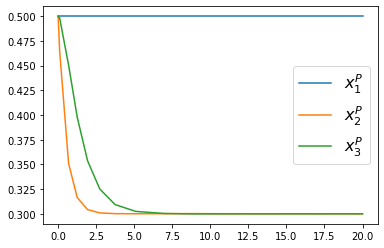

In [135]:
# Example
sol = c2_fff.solve_eq(0,20,10,0.8, dense=True)

fig, ax = plt.subplots(1)
ax.plot(sol.t, sol.y[1], label=r"$x_1^P$")
ax.plot(sol.t, sol.y[2], label=r"$x_2^P$")
ax.plot(sol.t, sol.y[3], label=r"$x_3^P$")
ax.legend(prop={'size':16})

In [136]:
pm_delta = 2.0
npoints = 70
I0 = calculate_I0(params_2, "SAT")
I_min, I_max = I0 - 3*pm_delta, I0 + 3*pm_delta
#if I_min < -params_1[1]: I_min = -params_1[1]
input_range = np.linspace(I_min, I_max, npoints)

print(f"Expected infinitesimal homeostasis point value: {I0:0.3}")
print(f"Interval to calculate set point: [{I_min:0.3},{I_max:0.3}]")

Expected infinitesimal homeostasis point value: 0.125
Interval to calculate set point: [-5.88,6.12]


Text(0.5, 1.0, 'SAT-FFF ($\\delta$=2.0, $\\gamma=1.0$, $\\alpha$=1.0, $\\beta$=1.0, $\\sigma$=0.5)')

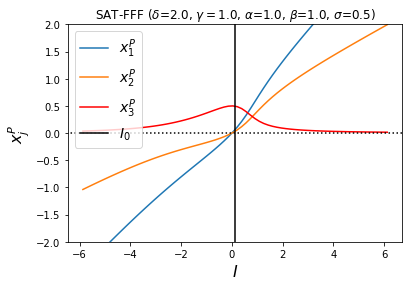

In [137]:
x1P, x2P, x3P = [], [], []

for I in input_range:
    sol = c2_fff.solve_eq(0,30,10,I,dense=True)
    x1P.append(sol.y[1][-1])
    x2P.append(sol.y[3][-1])
    x3P.append(sol.y[5][-1])
    
fig, ax = plt.subplots(1)    
ax.plot(input_range, x1P, label=r"$x_1^P$")
ax.plot(input_range, x2P, label=r"$x_2^P$")
ax.plot(input_range, x3P, c="red", label=r"$x_3^P$")
#ax.set_xlim([-1.0,4.6])
ax.set_ylim([-2,2])
ax.axvline(I0, 0, 1, color="black", label=r"$I_0$")
ax.axhline(0.0, -2, 2, color="black", ls=":")
ax.legend(prop={'size':14})

ax.set_xlabel(r"$I$", fontsize=16)
ax.set_ylabel(r"$x_j^P$", fontsize=16)
title2 = r"SAT-FFF ($\delta$=%0.1f, $\gamma=%0.1f$, $\alpha$=%0.1f, $\beta$=%0.1f, $\sigma$=%0.1f)" % (params_2[0], params_2[1], params_2[2], params_2[3], params_2[4])
ax.set_title(title2)
#fig.savefig("/tmp/pre_result_satfff_homeostasis.pdf")